In [3]:
! pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13948 sha256=0cc794200ba2a4bd584c3ae9e7767c6515761b7c2e5abf85e8d4fe6b8287b802
  Stored in directory: c:\users\user2018\appdata\local\pip\cache\wheels\ac\5b\f4\d5bcc930771126a32285e058c576eda84e43691453a9f7ad71
Successfully built pytesseract


In [1]:
! pip install contours

  Using cached contours-0.0.2.tar.gz (7.4 kB)
  Created wheel for contours: filename=contours-0.0.2-py3-none-any.whl size=8525 sha256=ece6f4c17d6075da803cf89d28e6afd738e69fad80967aa1603a85d5aba8e2df
  Stored in directory: c:\users\user2018\appdata\local\pip\cache\wheels\8a\f4\09\57bd7789bfda80e6535eed880fcd1180819b7a6a5219160958
Successfully built contours


In [1]:
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)

4.5.2


In [3]:
# your path may be different
#pytesseract.pytesseract.tesseract_cmd = 'C:/Program files (x86)/Tesseract-OCR/tesseract.exe'  

In [4]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program files/Tesseract-OCR/tesseract.exe'  

In [5]:
img = cv2.imread('d:\picture\Chen8888.jpg')

In [6]:
#convert my image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
#perform adaptive threshold so that I can extract proper contours from the image
#need this to extract the name plate from the image. 
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
contours,h = cv2.findContours(thresh,1,2)

In [8]:
#once I have the contours list, i need to find the contours which form rectangles.
#the contours can be approximated to minimum polygons, polygons of size 4 are probably rectangles

largest_rectangle = [0,0]
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==4:    #polygons with 4 points is what I need.
        area = cv2.contourArea(cnt)
        if area > largest_rectangle[0]:        
            
            #find the polygon which has the largest size.
            largest_rectangle = [cv2.contourArea(cnt), cnt, approx] 

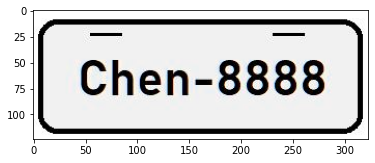

In [9]:
x,y,w,h = cv2.boundingRect(largest_rectangle[1])

#crop the rectangle to get the number plate.
roi=img[y:y+h,x:x+w]

#cv2.drawContours(img,[largest_rectangle[1]],0,(0,0,255),-1)
plt.imshow(roi, cmap = 'gray')
plt.show()

In [10]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11, 5)
text = pytesseract.image_to_string(roi)
print(text)

Chen-8888



In [11]:
# https://stackoverflow.com/questions/54419097/how-to-extract-and-recognize-the-vehicle-plate-number-with-python